In [18]:
# ----------------------------------------------------------------------------
# Title: Assignment 2.2
# Author: Surenther Selvaraj
# Date: 19 September 2025
# Modified By: Surenther Selvaraj
# Description: Graph Analysis with Matplotlib
# ----------------------------------------------------------------------------

## Introduction

The World Happiness Report is a widely recognized survey that serves as a landmark global analysis of human well-being. Published annually, this report uses data from the Gallup World Poll to rank over 150 countries by their citizens' perceived happiness levels. The core of the data is the "happiness score," derived from the "Cantril ladder" question, where respondents rate their life on a scale from 0 to 10.

Beyond the happiness score, the dataset provides insight into six key factors that are used to explain the variations in life evaluations across nations. These factors include a country's economic production (GDP per capita), the strength of its social support networks, the healthy life expectancy of its population, the perceived freedom to make life choices, and the levels of generosity and trust (or absence of corruption).

A unique aspect of this dataset is the use of "Dystopia," a hypothetical benchmark country with the world's lowest averages for each of the six factors. This provides a constant baseline for comparison, helping to illustrate the positive contributions of each factor to a country's happiness score. Ultimately, this report is not just a ranking; it's a valuable tool used by governments and organizations to better understand how well-being can be effectively measured and used to guide policy-making.

## Questions

The central question I'd like to explore with this data is: What are the strongest predictors of a country's happiness score? To answer this, we will focus on three key variables: GDP per capita, social support, and healthy life expectancy.

In [19]:
#Load Data from Kaggle
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
from kagglehub import KaggleDatasetAdapter

#Data Loading and Preparation
print("Loading the World Happiness Report dataset...")

# The path to the dataset on Kaggle
dataset_path = "unsdsn/world-happiness"

# The file name of the dataset
file_name = "2015.csv"

# Load the dataset directly into a pandas DataFrame
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    dataset_path,
    file_name
)

# Rename columns for easier use
df = df.rename(columns={
    'Ladder score': 'Happiness Score',
    'Logged GDP per capita': 'GDP per Capita',
    'Social support': 'Social Support',
    'Healthy life expectancy': 'Healthy Life Expectancy',
    'Country': 'Country name',
    'Economy (GDP per Capita)': 'GDP per Capita',
    'Freedom': 'Freedom to Make Choices'
})

print("Dataset loaded successfully.")

Loading the World Happiness Report dataset...
Dataset loaded successfully.


In [20]:
df.head(10)

,Country name,Region,Happiness Rank,Happiness Score,Standard Error,GDP per Capita,Family,Health (Life Expectancy),Freedom to Make Choices,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


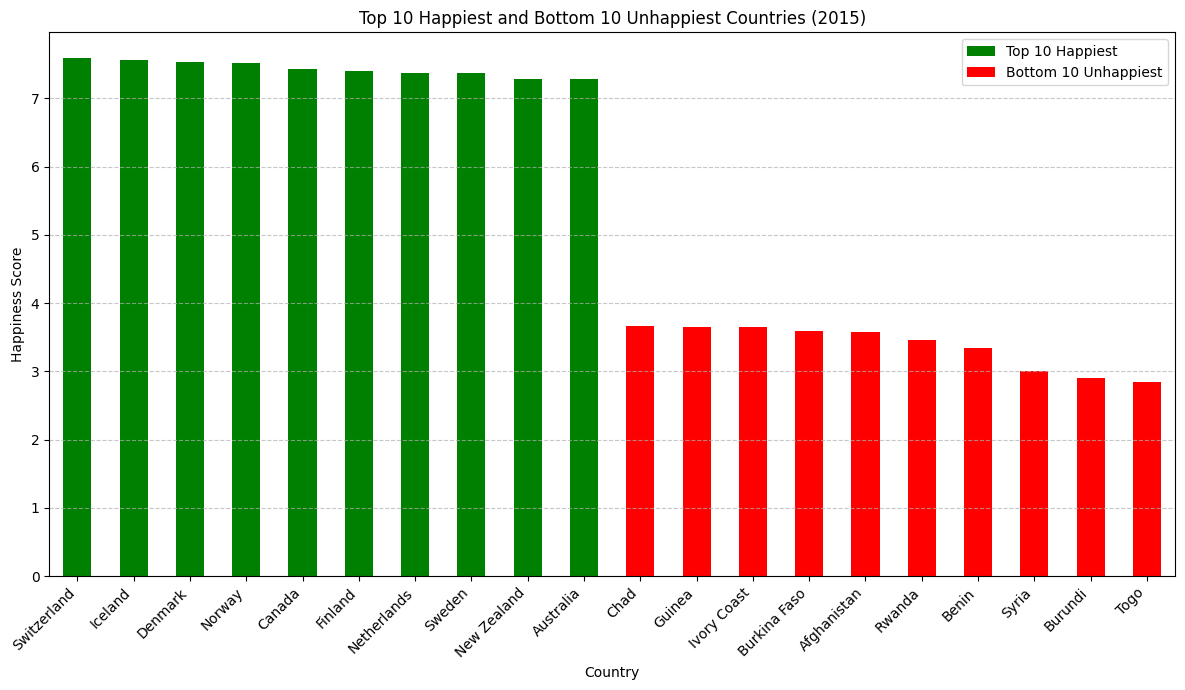

In [21]:
# --- Graph 1: Top and Bottom 10 Countries by Happiness Score ---

# Sort the data by happiness score
sorted_df = df.sort_values(by='Happiness Score', ascending=False)
top_10 = sorted_df.head(10)
bottom_10 = sorted_df.tail(10)

# Combine and plot
combined_df = pd.concat([top_10, bottom_10])
combined_df.set_index('Country name', inplace=True)
combined_df['Happiness Score'].plot(kind='bar', figsize=(12, 7), color=['green'] * 10 + ['red'] * 10)
plt.title('Top 10 Happiest and Bottom 10 Unhappiest Countries (2015)')
plt.ylabel('Happiness Score')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', label='Top 10 Happiest'),
    Patch(facecolor='red', label='Bottom 10 Unhappiest')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

## Graph 1 Analysis

The bar chart from the above, based on data from 2015, offers a clear visual comparison of happiness scores across the world. The top 10 happiest nations, represented by the green bars, consistently show high scores, with Switzerland at the top with a score exceeding 7.5.  Conversely, the red bars highlight the bottom 10 unhappiest countries, where scores are all below 4.0, a significant drop from the happiest nations. The chart's horizontal grid lines and the labeled y-axis make the precise differences in scores easy to read and understand. It is notable that European countries dominate the top of the list, while the unhappiest nations are scattered across different continents, often in regions facing political or economic instability. This simple yet powerful visualization demonstrates the wide disparity in perceived happiness around the globe. The distinct color-coding for the top and bottom groups effectively reinforces this finding, making the results immediately clear to the viewer.

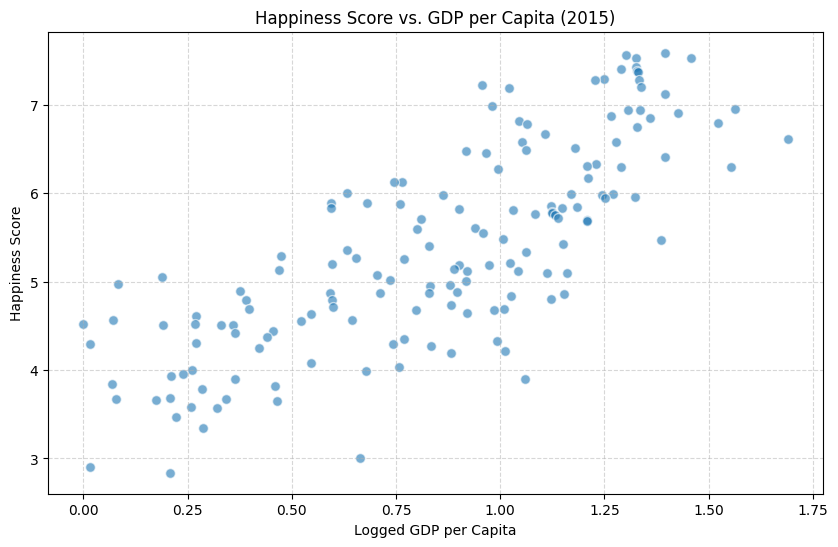

In [22]:
# --- Graph 2: Happiness Score vs. GDP per Capita ---

plt.figure(figsize=(10, 6))
plt.scatter(df['GDP per Capita'], df['Happiness Score'], alpha=0.6, edgecolors='w', s=50)
plt.title('Happiness Score vs. GDP per Capita (2015)')
plt.xlabel('Logged GDP per Capita')
plt.ylabel('Happiness Score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Graph 2 Analysis

Based on the scatter plot from the above, which shows the relationship between Happiness Score and GDP per Capita for 2015, a clear and positive correlation is evident.  The points on the graph generally trend upwards from the bottom-left to the top-right, indicating that countries with a higher GDP per capita tend to have a higher happiness score. However, the data points do not form a perfectly straight line, suggesting that while wealth is a significant factor, it is not the sole determinant of a country's happiness. There are countries with similar GDP per capita that have notably different happiness scores, and conversely, countries with different wealth levels can sometimes share a similar happiness score. The scatter plot's spread, particularly at the higher ends of the GDP scale, suggests a ceiling effect where increasing wealth has a diminishing return on happiness. Overall, the visualization makes a compelling case for a strong link between economic prosperity and well-being, but also highlights the complexity of happiness, which is influenced by other variables.

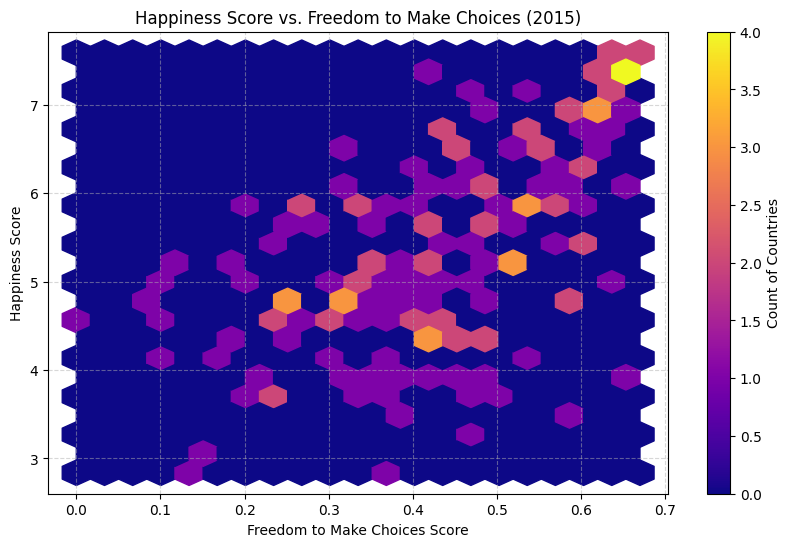

In [23]:
# --- Graph 3: Happiness Score vs. Freedom to Make Choices ---

plt.figure(figsize=(10, 6))
plt.hexbin(df['Freedom to Make Choices'], df['Happiness Score'], gridsize=20, cmap='plasma')
cb = plt.colorbar(label='Count of Countries')
plt.title('Happiness Score vs. Freedom to Make Choices (2015)')
plt.xlabel('Freedom to Make Choices Score')
plt.ylabel('Happiness Score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()